In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import zipfile
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
  zip_ref.extractall()

import os
print(os.listdir())

csv_files = []
for file_name in os.listdir():
  if file_name.endswith('.csv'):
    csv_files.append(file_name)

print(csv_files)

['.config', 'heart.csv', 'archive.zip', 'sample_data']
['heart.csv']


In [ ]:
dataframes = {}
for file_name in csv_files:
    try:
        df = pd.read_csv(file_name)
        dataframes[file_name] = df
        print(f"Successfully loaded {file_name}")
        display(df.head())
    except Exception as e:
        print(f"Error loading {file_name}: {e}")


Successfully loaded heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **DATA EXPLORATION, ANALYSIS AND PROCESSING: HEART DISEASE PREDICTION PROJECT**

In [ ]:
#first 5 rows of data
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#last 5 rows of data
data = pd.read_csv('heart.csv')
data.tail()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# **Variable Analysis (Attributes)**


In [ ]:
data['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
62,35
59,35
51,35


In [ ]:
#sorted by age ASC
data['Age'].value_counts().sort_index()

,count
Age,
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


In [ ]:
hist = px.histogram(data, x='Age', nbins=60)
hist.update_layout(width=800, height=500, title_text='Age Distribution')
hist.show()

<Axes: xlabel='Age', ylabel='Count'>

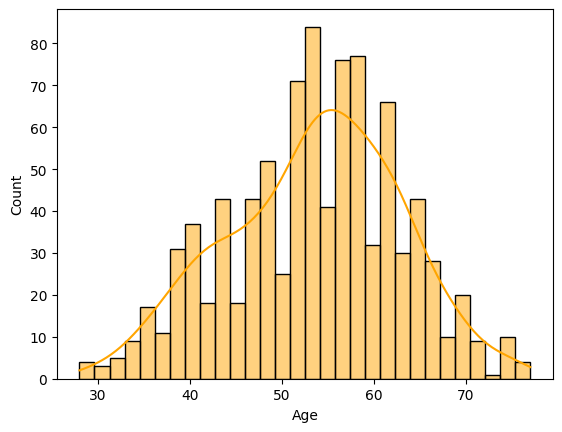

In [ ]:
sns.histplot(data, x='Age', bins=30, color='orange', kde=True, stat='count')

In [ ]:
data['Sex'].value_counts()

,count
Sex,
M,725
F,193


<Axes: xlabel='Sex', ylabel='count'>

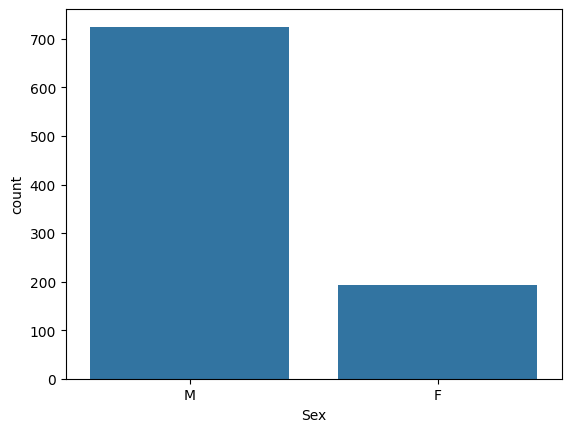

In [ ]:
sns.countplot(x='Sex', data=data)

In [ ]:
data['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


<Axes: xlabel='ChestPainType', ylabel='count'>

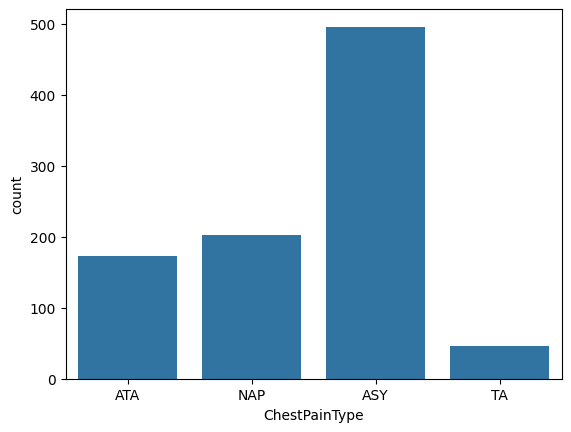

In [ ]:
sns.countplot(x='ChestPainType', data=data)

In [ ]:
data.RestingBP.value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


<Axes: xlabel='RestingBP', ylabel='Count'>

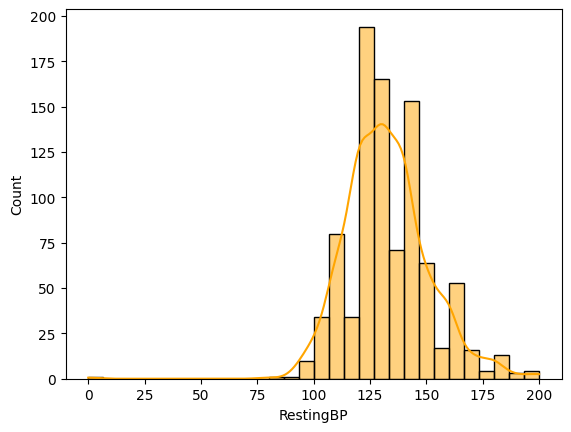

In [ ]:
sns.histplot(data, x='RestingBP', bins=30, color='orange', kde=True, stat='count')


In [ ]:
data.Cholesterol.value_counts().sort_index()

,count
Cholesterol,
0,172
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


<Axes: xlabel='Cholesterol', ylabel='Count'>

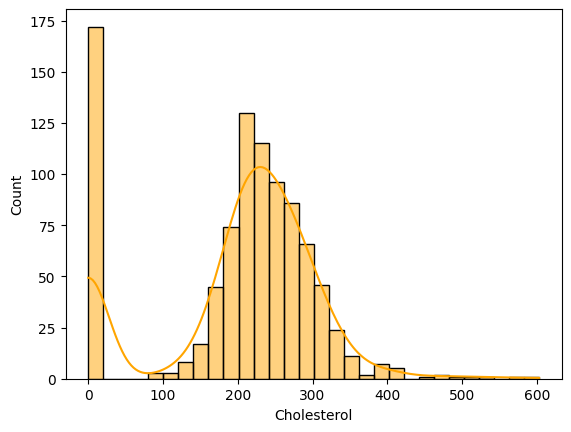

In [ ]:
sns.histplot(data, x='Cholesterol', bins=30, color='orange', kde=True, stat='count')

In [ ]:
data.FastingBS.value_counts()

,count
FastingBS,
0,704
1,214


<Axes: xlabel='FastingBS', ylabel='count'>

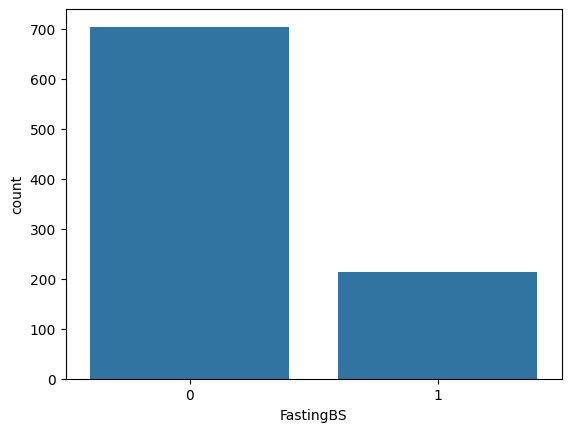

In [ ]:
sns.countplot(data, x='FastingBS')

In [ ]:
data.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


<Axes: xlabel='RestingECG', ylabel='count'>

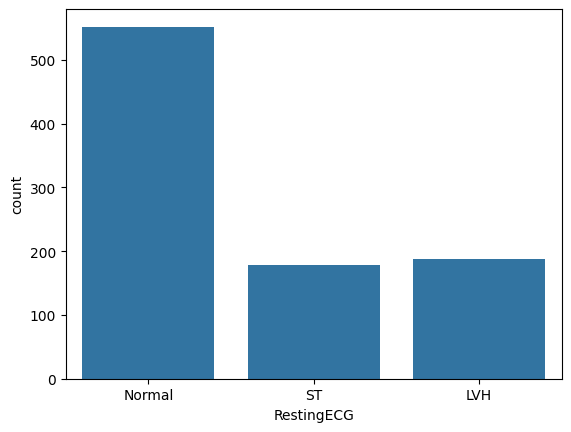

In [ ]:
sns.countplot(data, x='RestingECG')

In [ ]:
data['MaxHR'].value_counts().sort_index()

,count
MaxHR,
60,1
63,1
67,1
69,1
70,1
...,...
190,2
192,1
194,1


<Axes: xlabel='MaxHR', ylabel='Count'>

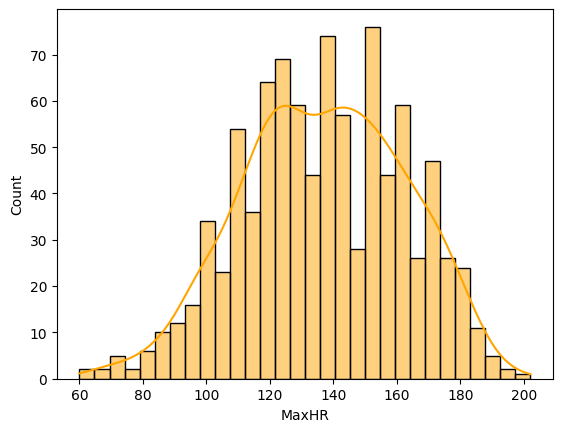

In [ ]:
sns.histplot(data, x='MaxHR', bins=30, color='orange', kde=True, stat='count')

In [ ]:
data["ExerciseAngina"].value_counts()

,count
ExerciseAngina,
N,547
Y,371


<Axes: xlabel='ExerciseAngina', ylabel='count'>

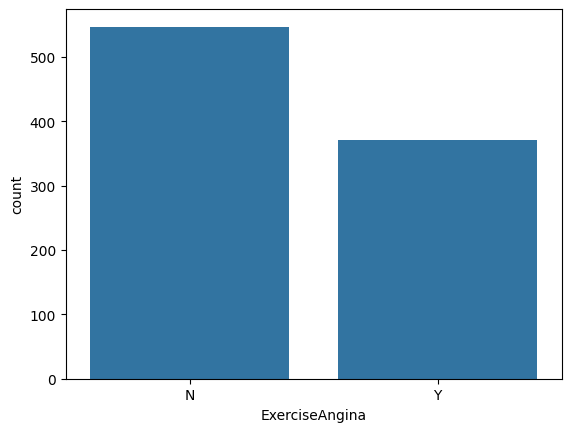

In [ ]:
sns.countplot(data, x='ExerciseAngina')

In [ ]:
data['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


<Axes: xlabel='Oldpeak', ylabel='Count'>

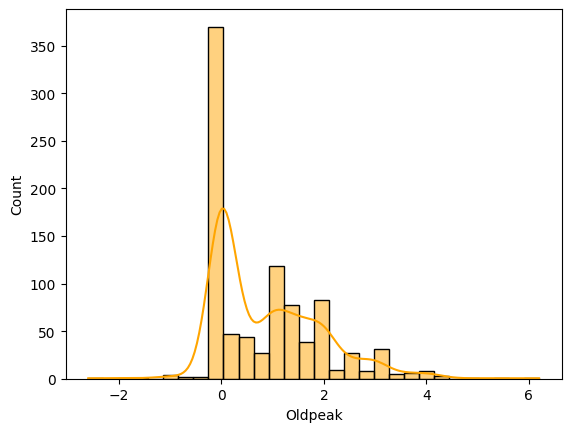

In [ ]:
sns.histplot(data, x='Oldpeak', bins=30, color='orange', kde=True, stat='count')

In [ ]:
data['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


<Axes: xlabel='ST_Slope', ylabel='count'>

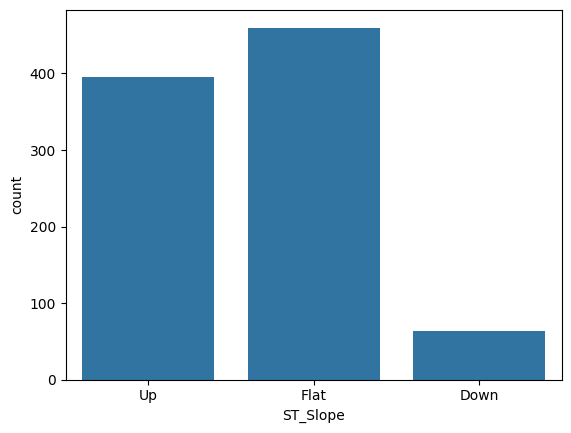

In [ ]:
sns.countplot(data, x='ST_Slope')

In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease', ylabel='count'>

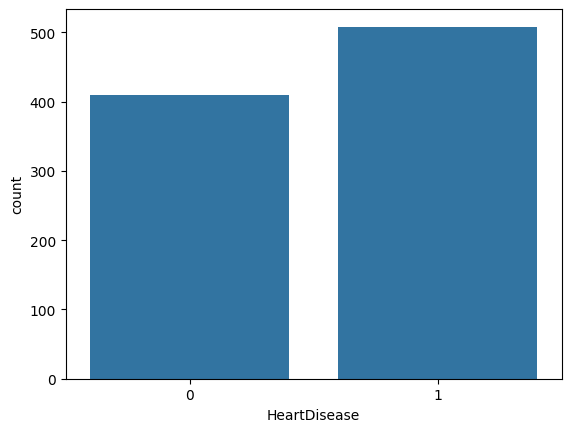

In [ ]:
sns.countplot(data, x='HeartDisease')

# **Attributes Types Analysis**

In [ ]:
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
#check if there's any variable with missing value
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#Removing missing values(rows)
data2 = data.dropna()

In [ ]:
data2.shape

(918, 12)

In [ ]:
data2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#Replace the missing values with mean (inplace: update the data2 dataset)
data2['Age'].fillna(data2['Age'].mean(), inplace=True)

/tmp/ipython-input-76-265359241.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data2['Age'].fillna(10, inplace=True)

/tmp/ipython-input-77-2009516058.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


# **Handling with Incoherent Values: Deleting record with zero perssure**

In [ ]:
data2 = data.loc[data.RestingBP != 0]

In [ ]:
data2.shape

(917, 12)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data2.Cholesterol.value_counts().sort_index()

,count
Cholesterol,
0,171
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


In [ ]:
data2.Cholesterol.mean()

np.float64(199.0163576881134)

In [ ]:
#replace the zeros with NaN, so it's considered in the mean calcualtion
data2.Cholesterol.replace(0, np.nan, inplace=True)

/tmp/ipython-input-85-936447736.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-85-936447736.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,254.0,0,Normal,150,N,0.0,Flat,1


<Axes: xlabel='Cholesterol', ylabel='Count'>

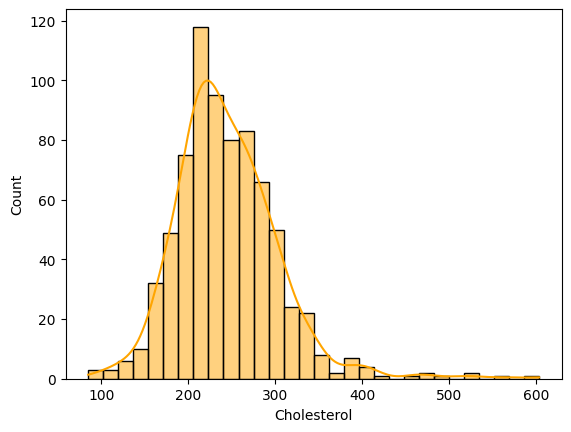

In [ ]:
sns.histplot(data2, x='Cholesterol', bins=30, color='orange', kde=True, stat='count')

In [ ]:
px.box(data2, y='Cholesterol')

In [ ]:
px.box(data2, y='RestingBP')

In [ ]:
data2.to_csv('pre_processed_heart_disease_dataset.csv', sep=';', encoding='utf-8', index=False)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
data2.shape

(917, 12)

In [ ]:
data2.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,float64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


# **Transforming nominal categorical variables into ordinal categorical variables:**

In [ ]:
data2['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
data2['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}, inplace=True)
data2['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
data2['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
data2['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

/tmp/ipython-input-98-3758954558.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-98-3758954558.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-98-3758954558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [ ]:
data2.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,float64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [ ]:
predictors = data2.iloc[:, 0:12].values
predictors

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  1. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1.2,  1. ,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  1. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [ ]:
predictors.shape

(917, 12)

In [ ]:
target = data2.iloc[:, 11].values
target.shape

(917,)

In [ ]:
data2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,746.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,59.153524,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,207.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,237.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,275.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


In [ ]:
scaled_predictors = StandardScaler().fit_transform(predictors)
scaled_predictors

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.83150225,
        -1.05109458, -1.1120186 ],
       [-0.47805725,  1.9368261 , -0.27058012, ...,  0.10625149,
         0.59651863,  0.89926553],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.83150225,
        -1.05109458, -1.1120186 ],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  0.29380223,
         0.59651863,  0.89926553],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.83150225,
         0.59651863,  0.89926553],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.83150225,
        -1.05109458, -1.1120186 ]])

In [ ]:
df = pd.DataFrame(scaled_predictors)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.432206,-0.516309,-1.344701,0.414627,0.750494,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095,-1.112019
1,-0.478057,1.936826,-0.270580,1.526360,-1.093405,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519,0.899266
2,-1.750256,-0.516309,-1.344701,-0.141240,0.648995,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095,-1.112019
3,-0.584074,1.936826,0.803541,0.303453,-0.518244,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519,0.899266
4,0.052026,-0.516309,-0.270580,0.970493,-0.839657,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095,-1.112019


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,7.460000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,-2.107340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17,3.099423e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000671e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.700473e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00,-1.112019e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-6.324301e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00,-1.112019e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,-1.291641e-01,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01,8.992655e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,5.136631e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01,8.992655e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.062277e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00,8.992655e-01


Encoding of categorical variables:
LabelEncoder: transforming categorical variables into numeric variable programmatically

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
label_encoded_predictors = data.iloc[:, 0:11].values
label_encoded_predictors

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [ ]:
label_encoded_predictors[:, 1] = LabelEncoder().fit_transform(label_encoded_predictors[:, 1])
label_encoded_predictors[:,2] = LabelEncoder().fit_transform(label_encoded_predictors[:,2])
label_encoded_predictors[:,6] = LabelEncoder().fit_transform(label_encoded_predictors[:,6])
label_encoded_predictors[:,8] = LabelEncoder().fit_transform(label_encoded_predictors[:,8])
label_encoded_predictors[:,10] = LabelEncoder().fit_transform(label_encoded_predictors[:,10])
label_encoded_predictors

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

In [ ]:
label_and_one_hot_encoding_predictors = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 2, 6, 8, 10])],
                                                          remainder='passthrough').fit_transform(label_encoded_predictors)

label_and_one_hot_encoding_predictors

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [ ]:
pd.DataFrame(label_and_one_hot_encoding_predictors).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289,0,172,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180,0,156,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283,0,98,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214,0,108,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195,0,122,0.0


In [ ]:
scaled_label_and_one_hot_encoding_predictors = StandardScaler().fit_transform(label_and_one_hot_encoding_predictors)
scaled_label_and_one_hot_encoding_predictors

array([[-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
         1.38292822, -0.83243239],
       [ 1.93816322, -1.93816322, -1.08413811, ..., -0.55134134,
         0.75415714,  0.10566353],
       [-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [-0.51595242,  0.51595242,  0.9223917 , ..., -0.55134134,
        -0.85706875,  0.29328271],
       [ 1.93816322, -1.93816322, -1.08413811, ..., -0.55134134,
         1.4615246 , -0.83243239],
       [-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
         1.42222641, -0.83243239]])

In [ ]:
df = pd.DataFrame(scaled_label_and_one_hot_encoding_predictors)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-7.740117e-18,7.740117e-18,-1.548023e-16,-9.288140e-17,6.192094e-17,7.740117e-18,1.238419e-16,9.288140e-17,0.000000,7.740117e-17,-7.740117e-18,-7.740117e-18,4.644070e-17,-6.192094e-17,-1.238419e-16,1.896329e-16,3.096047e-17,5.418082e-17,5.108477e-16,-1.548023e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-5.159524e-01,-1.938163e+00,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-2.706015e+00,-7.154995e+00,-1.818435e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00
25%,-5.159524e-01,5.159524e-01,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-6.906294e-01,-6.699346e-01,-2.337038e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01
50%,-5.159524e-01,5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,-8.235563e-01,-2.714484e-01,9.978237e-01,-8.690559e-01,5.188098e-02,-1.295128e-01,2.213632e-01,-5.513413e-01,4.678968e-02,-2.695748e-01
75%,-5.159524e-01,5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,1.214246e+00,-2.714484e-01,9.978237e-01,1.150674e+00,6.883185e-01,4.109089e-01,6.238346e-01,-5.513413e-01,7.541571e-01,5.747115e-01
max,1.938163e+00,5.159524e-01,9.223917e-01,2.075177e+00,1.876744e+00,4.353909e+00,1.970528e+00,8.142748e-01,2.038947,8.235563e-01,1.214246e+00,3.683942e+00,9.978237e-01,1.150674e+00,2.491558e+00,3.653439e+00,3.697252e+00,1.813758e+00,2.561874e+00,4.983762e+00


Dimension Reducution: The objective is to select the best component(attributes) for training the alogrithm, thorough the analysis of correlation between variables.


Principal Component Analysis(PCA)-> Feature Selection: Selects the best attributes and uses them without transformtion.
Feature Extraction: Finds the relationship of the best attributes and creates new attributes. It is an unsupervised learning alogrithms. It applied to linealy separable data.

In [ ]:
# Fill NaN values in Cholesterol column with the mean before applying PCA
data2['Cholesterol'].fillna(data2['Cholesterol'].mean(), inplace=True)

pca = PCA(n_components=4)
pca_predictors = pca.fit_transform(data2.iloc[:, 0:11].values)
pca_predictors.shape

/tmp/ipython-input-121-1810993707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(917, 4)

In [ ]:
pca.explained_variance_ratio_

array([0.72844082, 0.1718306 , 0.08121793, 0.01767869])

In [ ]:
pca.explained_variance_ratio_.sum()

np.float64(0.9991680439746077)

In [ ]:
kpca = KernelPCA(n_components=4, kernel='rbf')
kernel_predictors = kpca.fit_transform(data2.iloc[:, 0:11].values)
kernel_predictors.shape

(917, 4)

In [ ]:
# Fill NaN values in Cholesterol column with the mean before applying LDA
data2_copy = data2.copy()
data2_copy['Cholesterol'].fillna(data2_copy['Cholesterol'].mean(), inplace=True)

lda = LinearDiscriminantAnalysis(n_components=1)
lda_predictors = lda.fit_transform(data2_copy.iloc[:, 0:11].values, target)
lda_predictors.shape

/tmp/ipython-input-129-216440690.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





(917, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_label_and_one_hot_encoding_predictors, target, test_size=0.3, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(641, 20)
(276, 20)
(641,)
(276,)


In [ ]:
logistic = LogisticRegression(random_state=1, max_iter=500, penalty='l2', C=1, tol=0.0001, solver='lbfgs')
logistic.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1, max_iter=500, random_state=1)

In [ ]:
logistic.intercept_

array([-0.38316142])

In [ ]:
logistic.coef_

array([[ 0.57084745, -0.87231269, -0.21727127, -0.87071082, -0.30454675,
         1.0910636 , -0.11594304, -0.23516367,  0.04964147, -0.5822474 ,
         0.28078215, -1.24896893,  1.09835288, -0.15084919,  0.01549042,
        -0.00142333,  0.00329873,  0.95025908, -0.01128765,  0.29517781]])

In [ ]:
logistic_prediction = logistic.predict(x_test)

In [ ]:
print("Accuracy: %2f%%" % (accuracy_score(y_test, logistic_prediction) * 100.0))

Accuracy: 86.231884%


In [ ]:
confusion_matrix(y_test, logistic_prediction)

array([[102,  19],
       [ 19, 136]])

In [ ]:
print(classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       121
           1       0.88      0.88      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [ ]:
training_prediction = logistic.predict(x_train)
training_prediction

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_train, training_prediction)

0.8611544461778471

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


In [ ]:

model = LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")
prediction = cross_val_score(model, scaled_label_and_one_hot_encoding_predictors, target, cv = kfold)
print("Cross Validation Accuracy: %.2f%%" % (prediction.mean() * 100.0))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Cross Validation Accuracy: 86.26%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Ensure all predictor sets are based on the cleaned data2 dataframe without NaNs

# Use data2 for basic predictors (after cleaning steps applied earlier)
basic_predictors_cleaned = data2.iloc[:, 0:11].values

# Ensure Cholesterol NaNs are filled in basic_predictors_cleaned
if np.isnan(basic_predictors_cleaned).any():
    # Assuming the Cholesterol column is at index 4 in the sliced data2
    cholesterol_col_index = 4
    mean_cholesterol = np.nanmean(basic_predictors_cleaned[:, cholesterol_col_index])
    basic_predictors_cleaned[:, cholesterol_col_index] = np.nan_to_num(basic_predictors_cleaned[:, cholesterol_col_index], nan=mean_cholesterol)


# Re-create scaled_basic_predictors from the cleaned data2
scaled_basic_predictors = StandardScaler().fit_transform(basic_predictors_cleaned)


# Re-create encoded and scaled encoded predictors from the cleaned data2
# Apply label encoding to categorical columns in data2 (already done in data2_cleaned)
# Use the data2_cleaned dataframe created in the previous step (cell_id: 70a9fc58)
label_encoded_data2_for_onehot = data2_cleaned.copy()
# Re-apply label encoding for robustness in case data2_cleaned was not executed
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
     if label_encoded_data2_for_onehot[col].dtype == 'object':
        label_encoded_data2_for_onehot[col] = LabelEncoder().fit_transform(label_encoded_data2_for_onehot[col])


column_transformer = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 2, 6, 8, 10])],
                                       remainder='passthrough')

label_and_one_hot_encoding_predictors_cleaned = column_transformer.fit_transform(label_encoded_data2_for_onehot.iloc[:, 0:11].values)

scaled_label_and_one_hot_encoding_predictors_cleaned = StandardScaler().fit_transform(label_and_one_hot_encoding_predictors_cleaned)


all_predictors = {
  'Basic': basic_predictors_cleaned,
  'Scaled basic': scaled_basic_predictors,
  'Encoded': label_encoded_data2_for_onehot.iloc[:, 0:11].values, # Use label encoded data2
  'One hot encoded': label_and_one_hot_encoding_predictors_cleaned,
  'Scaled one hot encoded': scaled_label_and_one_hot_encoding_predictors_cleaned
}

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

for title, predictors in all_predictors.items():
  print(f"==== {title} ====")

  logistic = LogisticRegression(random_state=1, max_iter=1000, penalty="l2", tol=0.0001, C=1, solver="lbfgs")
  x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

  try:
    logistic.fit(x_train, y_train)
    logistic_prediction = logistic.predict(x_test)
    print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, logistic_prediction) * 100.0))

    training_prediction = logistic.predict(x_train)
    print("Training Accuracy: %.2f%%" % (accuracy_score(y_train, training_prediction) * 100.0))

    # Cross-validation should also use the correct predictors
    model = LogisticRegression(random_state=1, max_iter=1000, penalty="l2", tol=0.0001, C=1, solver="lbfgs")
    # Ensure cross_val_score uses the correct predictors for each iteration
    prediction = cross_val_score(model, predictors, target, cv = kfold)
    print("Cross validation Accuracy: %.2f%%\n" % (prediction.mean() * 100.0))

  except ValueError as e:
      print(f"Error during training/prediction for {title}: {e}")

==== Basic ====
Test Accuracy: 85.51%
Training Accuracy: 84.87%
Cross validation Accuracy: 83.97%

==== Scaled basic ====
Test Accuracy: 85.87%
Training Accuracy: 84.87%
Cross validation Accuracy: 84.53%

==== Encoded ====
Test Accuracy: 85.51%
Training Accuracy: 84.87%
Cross validation Accuracy: 83.97%

==== One hot encoded ====


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Test Accuracy: 86.23%
Training Accuracy: 86.27%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Cross validation Accuracy: 85.83%

==== Scaled one hot encoded ====
Test Accuracy: 86.23%
Training Accuracy: 85.80%
Cross validation Accuracy: 85.83%



In [ ]:
Svm = SVC(kernel='rbf', random_state=1, C=2)
Svm.fit(x_train, y_train)

SVC(C=2, random_state=1)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(scaled_label_and_one_hot_encoding_predictors, target, test_size=0.3, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(641, 20)
(641,)
(276, 20)
(276,)


In [ ]:
svm_prediction = Svm.predict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, svm_prediction) * 100.0))

NameError: name 'svm_prediction' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA, KernelPCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.svm import SVC


In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
data2 = pd.DataFrame.copy(data)

In [ ]:
data2['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
data2['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}, inplace=True)
data2['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
data2['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
data2['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

/tmp/ipython-input-188-3758954558.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-188-3758954558.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-188-3758954558.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through c

In [ ]:
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


In [ ]:
data2.shape

(918, 12)

In [ ]:
data2.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [ ]:
Predictors = data2.iloc[:, 0:11].values
Predictors

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [ ]:
Predictors.shape

(918, 11)

In [ ]:
target = data2.iloc[:, 11].values
target

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
target.shape

(918,)

Analysis of attributes: Scaling

In [ ]:
data2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
scaled_predictors = StandardScaler().fit_transform(Predictors)
scaled_predictors

array([[-1.4331398 , -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239, -1.05211381],
       [-0.47848359,  1.93816322, -0.27042192, ..., -0.8235563 ,
         0.10566353,  0.59607813],
       [-1.75135854, -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239, -1.05211381],
       ...,
       [ 0.37009972, -0.51595242,  0.80424181, ...,  1.21424608,
         0.29328271,  0.59607813],
       [ 0.37009972,  1.93816322, -1.34508565, ..., -0.8235563 ,
        -0.83243239,  0.59607813],
       [-1.64528563, -0.51595242, -0.27042192, ..., -0.8235563 ,
        -0.83243239, -1.05211381]])

In [ ]:
df = pd.DataFrame(scaled_predictors)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.433140,-0.515952,-1.345086,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.052114
1,-0.478484,1.938163,-0.270422,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.596078
2,-1.751359,-0.515952,-1.345086,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.052114
3,-0.584556,1.938163,0.804242,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.596078
4,0.051881,-0.515952,-0.270422,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.052114


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.083616e-16,7.740117e-18,1.935029e-17,1.954380e-16,0.000000,-3.096047e-17,0.000000,4.953675e-16,-3.870058e-18,1.238419e-16,-7.740117e-17
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-5.159524e-01,-2.419749e+00,-7.154995e+00,-1.818435,-5.513413e-01,-0.749180,-3.018469e+00,-8.235563e-01,-3.271482e+00,-1.052114e+00
25%,-6.906294e-01,-5.159524e-01,-2.704219e-01,-6.699346e-01,-0.233704,-5.513413e-01,-0.749180,-6.605778e-01,-8.235563e-01,-8.324324e-01,-1.052114e+00
50%,5.188098e-02,-5.159524e-01,8.042418e-01,-1.295128e-01,0.221363,-5.513413e-01,-0.749180,4.678968e-02,-8.235563e-01,-2.695748e-01,5.960781e-01
75%,6.883185e-01,-5.159524e-01,8.042418e-01,4.109089e-01,0.623835,-5.513413e-01,0.492241,7.541571e-01,1.214246e+00,5.747115e-01,5.960781e-01
max,2.491558e+00,1.938163e+00,8.042418e-01,3.653439e+00,3.697252,1.813758e+00,1.733661,2.561874e+00,1.214246e+00,4.983762e+00,2.244270e+00


Encoding of categorical variables: LabelEncoder: transforming categorical variables into numeric varibles programmatically

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
categorical_count = data.select_dtypes(include=['object']).nunique()
print(categorical_count)

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64


In [ ]:
label_encoded_predictors = data.iloc[:, 0:11].values
label_encoded_predictors

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [ ]:
label_encoded_predictors[:, 1] = LabelEncoder().fit_transform(label_encoded_predictors[:, 1])
label_encoded_predictors[:,2] = LabelEncoder().fit_transform(label_encoded_predictors[:,2])
label_encoded_predictors[:,6] = LabelEncoder().fit_transform(label_encoded_predictors[:,6])
label_encoded_predictors[:,8] = LabelEncoder().fit_transform(label_encoded_predictors[:,8])
label_encoded_predictors[:,10] = LabelEncoder().fit_transform(label_encoded_predictors[:,10])
label_encoded_predictors

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df = pd.DataFrame({'city': ['Delhi', 'Mumbai', 'Punjab', 'Delhi']})

In [ ]:
df

,city
0,Delhi
1,Mumbai
2,Punjab
3,Delhi


In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
ohe = encoder.fit_transform(df[['city']])
ohe

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])